# Link Budget

1. Input Parameters:
    - Frequency (Hz)
    - Trasnmitted Power (dBm)
    - Transmitter Antenna Gain (dBi)
    - Receiver Antenna Gain (dBi)
    - Other Loss (dB)
2. Result:
    - Free Space Path Loss (dB)
    - Link Budget (dB)
3. Plot:
    - Link Budget (dB) vs. Distance (m) for Wifi and Bluetooth signals 

# Comparison:
1. Bluetooth: Lower transmitter power and antenna gain result in a higher path loss and shorter range (typically up to 10 meters).

2. Wi-Fi: Higher transmitter power and antenna gain result in a lower path loss and longer range (typically up to 90 meters outdoors, 45 meters indoors).

In summary, Wi-Fi generally has a higher link budget due to its higher transmitter power and better antenna gains, allowing it to cover larger distances compared to Bluetooth.

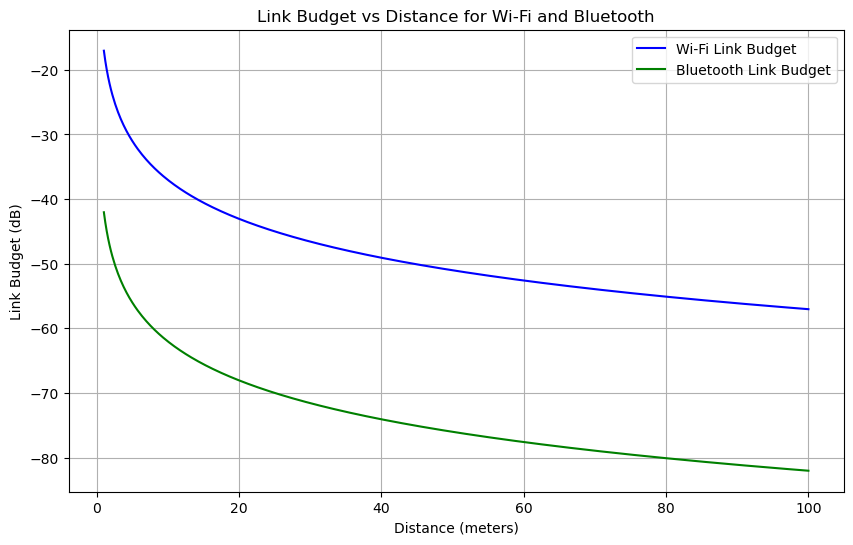

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def free_space_path_loss(distance, frequency):
    c = 3e8  # speed of light in m/s
    fspl = 20 * np.log10(distance) + 20 * np.log10(frequency) + 20 * np.log10(4 * np.pi / c)
    return fspl

def link_budget(transmitter_power, transmit_antenna_gain, receive_antenna_gain, path_loss, other_losses):
    return transmitter_power + transmit_antenna_gain + receive_antenna_gain - path_loss - other_losses

# Parameters
frequency = 2.4e9  # 2.4 GHz in Hz
distances = np.linspace(1, 100, 500)  # distances from 1 to 100 meters

# Wi-Fi parameters
wifi_transmitter_power = 20  # dBm
wifi_transmit_antenna_gain = 3  # dBi
wifi_receive_antenna_gain = 3  # dBi
wifi_other_losses = 3  # dB

# Bluetooth parameters
bluetooth_transmitter_power = 0  # dBm
bluetooth_transmit_antenna_gain = 0  # dBi
bluetooth_receive_antenna_gain = 0  # dBi
bluetooth_other_losses = 2  # dB

# Calculate Path Loss
path_loss_wifi = free_space_path_loss(distances, frequency)
path_loss_bluetooth = free_space_path_loss(distances, frequency)

# Calculate Link Budgets
wifi_link_budgets = link_budget(wifi_transmitter_power, wifi_transmit_antenna_gain, wifi_receive_antenna_gain, path_loss_wifi, wifi_other_losses)
bluetooth_link_budgets = link_budget(bluetooth_transmitter_power, bluetooth_transmit_antenna_gain, bluetooth_receive_antenna_gain, path_loss_bluetooth, bluetooth_other_losses)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(distances, wifi_link_budgets, label='Wi-Fi Link Budget', color='blue')
plt.plot(distances, bluetooth_link_budgets, label='Bluetooth Link Budget', color='green')
plt.xlabel('Distance (meters)')
plt.ylabel('Link Budget (dB)')
plt.title('Link Budget vs Distance for Wi-Fi and Bluetooth')
plt.legend()
plt.grid(True)
plt.show()
